In [16]:
from math import pi, sqrt

In [2]:
times_arr = [33.15, 68.58, 112.49, 157.3, 205.92]
radians_arr = [deg/360 * (2*pi) for deg in [25, 20, 15, 10, 5]]

In [3]:
k = sum([(sec - sum(times_arr)/5)*(rads - sum(radians_arr)/5) for rads,sec in zip(radians_arr, times_arr)]) /\
    sum([(sec - sum(times_arr)/5)**2 for sec in times_arr])

In [4]:
k

-0.0020034979853208288

In [5]:
shift = sum(radians_arr)/5 - k*sum(times_arr)/5

In [6]:
shift

0.49317936312788135

In [7]:
periods = [2.18, 2.03, 1.90, 1.80, 1.69, 1.67][::-1]

In [8]:
sum([period**2 for period in periods])/6

3.561383333333333

In [9]:
I_arr = [0.032, 0.036, 0.040, 0.046, 0.053, 0.060]

In [10]:
b = sum([(I - sum(I_arr)/6)*(T**2 - sum([p**2 for p in periods])/6) for T,I in zip(periods, I_arr)]) / \
    sum([(I - sum(I_arr)/6)**2 for I in I_arr])

In [11]:
a = sum([p**2 for p in periods])/6 - b * sum(I_arr)/6

In [12]:
a

0.37201265897663305

In [13]:
b

71.67125110913932

In [14]:
l_pr_exp = [(T**2 * 9.82)/(4 * pi**2) for T in periods]

In [15]:
l_pr_exp

[0.6937207634425843,
 0.7104363270351626,
 0.8059289589278833,
 0.8979640560894008,
 1.025047113224047,
 1.1821286371632322]

In [31]:
sigma_k = sqrt(
    sum([(r - (shift + k*t))**2 for r,t in zip(radians_arr, times_arr)]) /\
    (sum([(t-sum(times_arr)/5)**2 for t in times_arr])*3)
)
delta_k = 2 * sigma_k
epsilon_k = delta_k / abs(k)

print(f"{sigma_k:.8f}", f"{delta_k:.8f}",  f"{epsilon_k:.8f}")

0.00006354 0.00012709 0.06343275


In [33]:
sigma_b = sqrt(
    sum([(p**2 - (a + b*i))**2 for p,i in zip(periods, I_arr)]) /\
    (sum([(i-sum(I_arr)/6)**2 for i in I_arr])*4)
)
delta_b = 2 * sigma_b
epsilon_b = delta_b / abs(b)

print(f"{sigma_b:.8f}", f"{delta_b:.8f}",  f"{epsilon_b:.8f}")

4.04152183 8.08304365 0.11277944


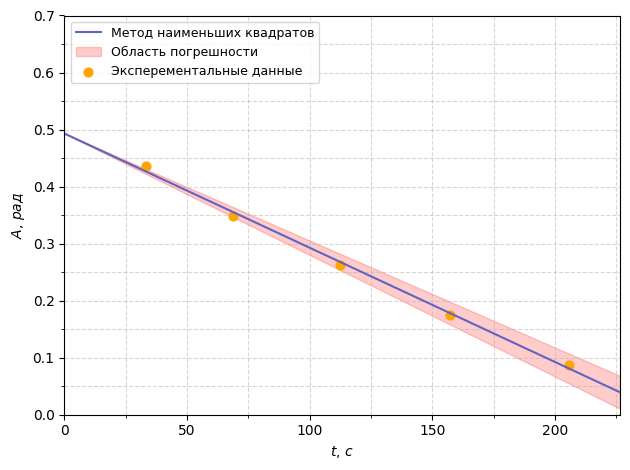

In [37]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

ax = plt.axes()
ax.yaxis.set_minor_locator(MultipleLocator(0.1/2))
ax.xaxis.set_minor_locator(MultipleLocator(25))


f = lambda x: shift + k*x
x = [33.15, 68.58, 112.49, 157.35, 205.92]
y = radians_arr
x_max = max(x) * 1.1
y_max = f(x_max)


ax.set_xlim(0, x_max)
ax.set_ylim(0, 0.7)

# linear
plt.plot(
    [0, x_max],
    [shift, f(x_max)],
    color ="#6263c1",
    
    label='Метод наименьших квадратов'
)

plt.fill_between(
    [0, x_max],
    [shift, shift + (k - delta_k)*x_max],
    [shift, shift + (k + delta_k)*x_max],
    color='red',
    alpha=0.2,
    label='Область погрешности'
)

# points
plt.scatter(
    x,
    y,
    color='orange',
    s=40,
    marker='o',

    label='Эксперементальные данные'
)

# plot settings
plt.grid(True, alpha=0.5, linestyle='--', which='both')

plt.ylabel(r'$A$, $рад$', fontsize = 10)
plt.xlabel(r'$t$, $c$', fontsize = 10)

plt.legend(
    loc="upper left",
    fontsize=9
)
plt.tight_layout()

plt.savefig("plot1.png", dpi=700)

plt.show()

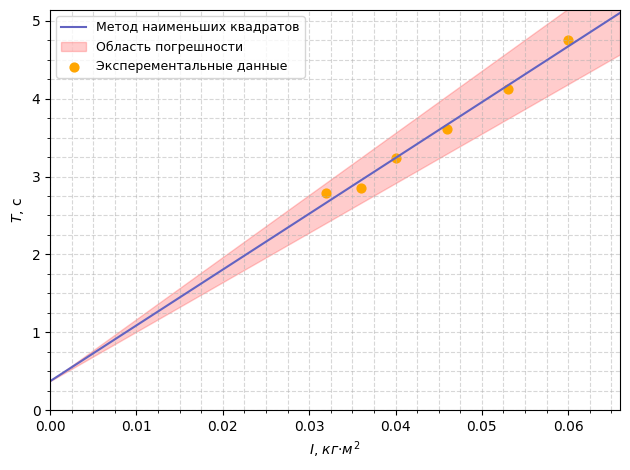

In [38]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

ax = plt.axes()
ax.yaxis.set_minor_locator(MultipleLocator(1/4))
ax.xaxis.set_minor_locator(MultipleLocator(0.01/4))


f = lambda x: a + b*x
x = I_arr
y = [p**2 for p in periods]
x_max = max(x) * 1.1
y_max = f(max(x)) * 1.1


ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)

# linear
plt.plot(
    [0, x_max],
    [a, f(x_max)],
    color ="#6263c1",
    
    label='Метод наименьших квадратов'
)

plt.fill_between(
    [0, x_max],
    [a, a + (b - delta_b)*x_max],
    [a, a + (b + delta_b)*x_max],
    color='red',
    alpha=0.2,
    label='Область погрешности'
)

# points
plt.scatter(
    x,
    y,
    color='orange',
    s=40,
    marker='o',

    label='Эксперементальные данные'
)

# plot settings
plt.grid(True, alpha=0.5, linestyle='--', which='both')

plt.ylabel(r'$T$, с', fontsize = 10)
plt.xlabel(r'$I$, $кг ⋅ м^2$', fontsize = 10)

plt.legend(
    loc="upper left",
    fontsize=9
)
plt.tight_layout()

plt.savefig("plot2.png", dpi=700)

plt.show()